# Classification using Scikit-Learn

<!--我们简单介绍Python的Scikit-Learn包以及里面的3个分类器：Linear SVM, Random Forest和K-Nearest Neighbors-->
We briefly introduce the classifiers in Scikit-Learn: LinearSVM, Random Forest and K-Nearest Neighbors

## Linear Support Vector Machine

<!--### Motivation
假设某些给定的数据点各自属于两个类之一，而目标是确定新数据点将在哪个类中。
对于支持向量机来说，数据点被视为向量，而我们想知道是否可以用一些超平面来分开这些点。
可能有许多超平面可以把数据分类，而最佳超平面的一个合理选择是以最大间隔把两个类分开的超平面。
因此，我们要选择能够让到每边最近的数据点的距离最大化的超平面。
SVM就是通过找到满足这些条件的超平面来完成数据分类任务。-->

### <!--用法--> Usage

The grammer of using Linear SVM in Scikit-Learn is as follows, 
<!--在Scikit-Learn (sklearn) 中，内置的线性SVM分类器通过如下语句来调用：-->

In [ ]:
# NOT FOR RUN
clf = svm.SVC(kernel='linear')

or

In [ ]:
# NOT FOR RUN
clf = svm.LinearSVC()

<!--其中，这两者是类似的。针对线性SVM，我们用后者作为例子。
我们大多数情况下只需要调节一个参数：惩罚项C， 默认C = 1.0。
因此，一个通常的线性SVM分类器表示如下：-->
Both of these two style are OK.

By adding the parameter into the classiffier, here we use the second one as the example:

In [ ]:
# NOT FOR RUN
clf = svm.LinearSVC(C = 100)

<!--这样，一个线性SVM分类器就搭建好了，只要有训练数据X_train和对应的标签y_train，我们就能训练一个线性SVM分类器：-->
Now we need to fit the classifier by the training data:

In [ ]:
# NOT FOR RUN
clf.fit(X_train, y_train)

<!--下面我们来一遍完整的过程。-->

### <!--完整过程--> A total example 

<!--首先，我们获取一些iris植物的特征，并且取前两个特征作为我们的数据：-->
For this example, we applied the **iris** data as the dataset.

We use the first two features of iris:

In [3]:
# Load iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

<!--我们来看下我们的iris数据长什么样：-->
Now let's see what our data looks like:

Total sample number in the dataset: 150
Total class number in the dataset: 3


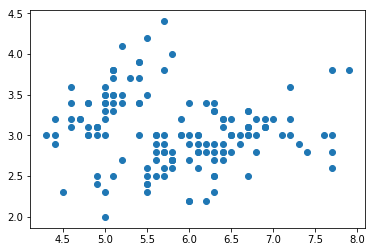

In [4]:
import numpy as np
print ("Total sample number in the dataset: {}".format(X.shape[0]))
print ("Total class number in the dataset: {}".format(len(np.unique(y))))
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(X[:,0], X[:,1])

<!--然后，我们标准化这些数据：-->
Then we standardize these data,

In [5]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

<!--接下来，我们把这些数据随机分成训练集和测试集：-->
After that, we separate these data into training set and testing set by a random approach with a proportion

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

<!--这里我们来看一下测试数据的样子：-->
Let's see the data after the splitting:

Training Sample: 90
Test Sample: 60


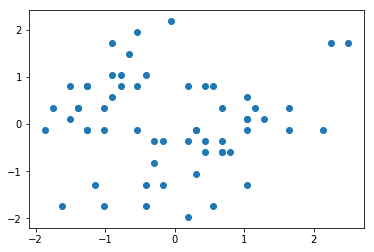

In [7]:
print ("Training Sample: {}".format(len(y_train)))
print ("Test Sample: {}".format(len(y_test)))
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1])

<!--下面我们就可以用刚才提到的方法来建立一个线性SVM分类器并且训练它：-->
Now we can train a clssifier by the training data,

In [8]:
from sklearn import svm
svmclf = svm.LinearSVC(C = 100)
svmclf.fit(X_train, y_train)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<!--接下来，我们可以用这个分类器来预测我们的测试数据并且得到相应的分类得分：-->
We can see the classification score on the testing set,

In [9]:
svm_y_predicted = svmclf.predict(X_test)
score = svmclf.score(X_test, y_test)

print ("The Linear SVM classification mean accuracy is {}%.".format(score*100))

The Linear SVM classification mean accuracy is 80.0%.


<!--我们可以根据预测的分类结果画出测试数据集的数据分布：-->
Also, we can plot the classification result on the testing set:

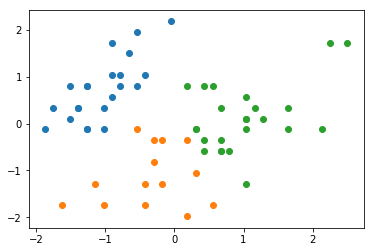

In [10]:
SVM_Class_One = np.where(svm_y_predicted==0)
SVM_Class_Two = np.where(svm_y_predicted==1)
SVM_Class_Three = np.where(svm_y_predicted==2)

plt.figure()
plt.scatter(X_test[SVM_Class_One,0], X_test[SVM_Class_One,1])
plt.scatter(X_test[SVM_Class_Two,0], X_test[SVM_Class_Two,1])
plt.scatter(X_test[SVM_Class_Three,0], X_test[SVM_Class_Three,1])

## Random Forest <!--随机森林-->

<!--### 动机
决策树可以很好的帮助人们完成各种决策任务，但是在很多情况下，单独一棵树来决策并不是什么明智的选择。
在这种情况下，通过某种手段把多个决策树集合起来会得到更好的结果。
随机森林就是一个包含多个决策树的分类器，并且其输出的类别是由单个树输出的类别的**众数**决定。-->

### <!--用法-->Usage
<!--在Scikit-Learn里面，随机森林分类器通过如下语句调用：-->
Random Forest classifier can be called in Scikit-Learn by the following code:

In [ ]:
# NOT FOR RUN
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF()

<!--随机森林里面的参数比较多，我们经常调节如下几个参数：
+ *n_estimators*: 这个参数代表森林中树的个数，默认是10。
+ *max_depth*： 单个树的最大深度（节点层数），默认是None，不建议调太大。
+ *n_jobs*： 并行化参数。**Windows**请无视， **Linux**和**Mac**可以设置为-1, 表示所有的CPU物理核都参与。-->

There are some parameters we can tune for better result:
+ *n_estimators*: the tree number of the forest, default = 10
+ *max_depth*： max depth of single tree
+ *n_jobs*： parameter for parallalization. **Works fine only in Mac/Linux system, not in Windows**

<!--一个看起来没啥问题的随机森林如下：-->
So a random forest classifier that seems all right is just like:

In [ ]:
# NOT FOR RUN
clf = RF(n_estimators=100, max_depth=3)

<!--同样，我们也是fit()函数来训练这个分类器：-->
Also, we use *fit()* to train the classifier,

In [ ]:
# NOT FOR RUN
clf.fit(X_train, y_train)

### <!--完整过程--> A totoal example for Random Forest

<!--由于我们在上一个例子里面已经获取了iris数据集并且已经标准化以及分出来了训练集测试集，所以我们现在可以直接来用：-->
We can use the iris data loaded in the previous example, so we just call the random forest classifier,

In [13]:
from sklearn.ensemble import RandomForestClassifier as RF
rfclf = RF(n_estimators = 100, max_depth = 4)
rfclf.fit(X_train, y_train)

rf_y_predicted = rfclf.predict(X_test)
score = rfclf.score(X_test, y_test)
print ("The Random Forest classification mean accuracy on the testing set is {}%.".format(score*100))

The Random Forest classification mean accuracy on the testing set is 75.0%.


<!--在测试集上的测试结果如下图所示：-->
We can also plot the classification result,

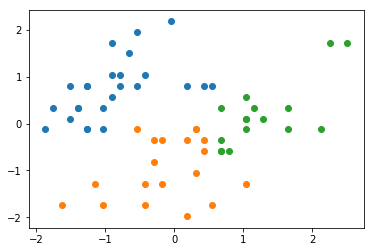

In [14]:
RF_Class_One = np.where(rf_y_predicted==0)
RF_Class_Two = np.where(rf_y_predicted==1)
RF_Class_Three = np.where(rf_y_predicted==2)

plt.figure()
plt.scatter(X_test[RF_Class_One,0], X_test[RF_Class_One,1])
plt.scatter(X_test[RF_Class_Two,0], X_test[RF_Class_Two,1])
plt.scatter(X_test[RF_Class_Three,0], X_test[RF_Class_Three,1])

## K-Nearest Neighbors 

<!--### 基本概念
对于一个给定的数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。
**类似于现实生活中少数服从多数**-->

### <!--用法-->Usage
<!--在Scikit-Learn里面，随机森林分类器通过如下语句调用：-->
The K-nearest neighbors classifier in Scikit-Learning can be called as follow,

In [ ]:
# NOT FOR RUN
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN()

<!--KNN分类器中，我们需要调节如下参数：
+ *n_neighbors*：邻居的数量，默认是5。
+ *weights*: 邻居的权重，默认为“uniform”，意思是每个邻居的权重一样，还可以选择“distance”，根据邻居与新实例的距离加权，距离越近，权重越高。
一个看起来没问题的KNN如下：-->

We need to tune the following two parameters:
+ *n_neighbors*：the number of neighbor, default = 5
+ *weights*: the weight for the neighbor, and there are only two choises, "uniform" and "distance". Default is "uniform".

In [ ]:
# NOT FOR RUN
clf = KNN(n_neighbors = 10, weights = 'distance')
clf.fit(X_train, y_train)

### <!--完整过程-->A total example for KNN

<!--同样，我们用前面已经准备好的iris数据集：-->
Also, we use the preloaded iris dataset for KNN.

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knnclf = KNN(n_neighbors = 10, weights = 'uniform')
knnclf.fit(X_train, y_train)

knn_y_predicted = knnclf.predict(X_test)
score = knnclf.score(X_test, y_test)
print ("The K-Nearest Neighbors classification mean accuracy on testing set is {}%.".format(score*100))

The K-Nearest Neighbors classification mean accuracy on testing set is 76.66666666666667%.


<!--在测试集上的测试结果如下图所示：-->
Let's plotting the classification results:

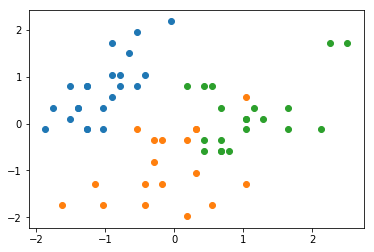

In [16]:
KNN_Class_One = np.where(knn_y_predicted==0)
KNN_Class_Two = np.where(knn_y_predicted==1)
KNN_Class_Three = np.where(knn_y_predicted==2)

plt.figure()
plt.scatter(X_test[KNN_Class_One,0], X_test[KNN_Class_One,1])
plt.scatter(X_test[KNN_Class_Two,0], X_test[KNN_Class_Two,1])
plt.scatter(X_test[KNN_Class_Three,0], X_test[KNN_Class_Three,1])

<!--我们把这3个分类器在测试集上的的结果放在一起：-->
We can see the three results together:

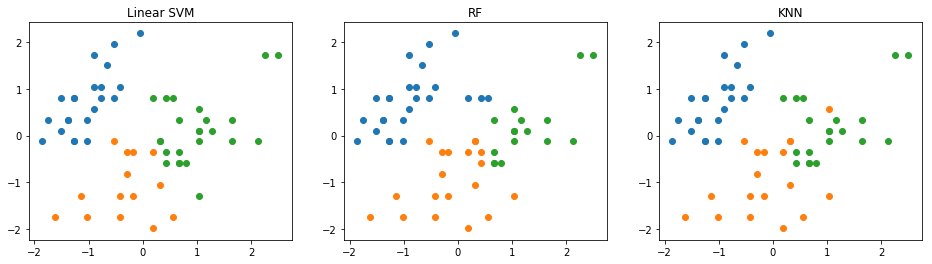

In [17]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(131)
ax1.set_title("Linear SVM")
ax1.scatter(X_test[SVM_Class_One,0], X_test[SVM_Class_One,1])
ax1.scatter(X_test[SVM_Class_Two,0], X_test[SVM_Class_Two,1])
ax1.scatter(X_test[SVM_Class_Three,0], X_test[SVM_Class_Three,1])

ax2 = fig.add_subplot(132)
ax2.set_title("RF")
ax2.scatter(X_test[RF_Class_One,0], X_test[RF_Class_One,1])
ax2.scatter(X_test[RF_Class_Two,0], X_test[RF_Class_Two,1])
ax2.scatter(X_test[RF_Class_Three,0], X_test[RF_Class_Three,1])

ax3 = fig.add_subplot(133)
ax3.set_title("KNN")
ax3.scatter(X_test[KNN_Class_One,0], X_test[KNN_Class_One,1])
ax3.scatter(X_test[KNN_Class_Two,0], X_test[KNN_Class_Two,1])
ax3.scatter(X_test[KNN_Class_Three,0], X_test[KNN_Class_Three,1])

plt.show()

## <!--参数调节--> Parameter Tuning

<!--上面的三个例子里面的参数都是随机选取的，所以结果不一定很好。
现在我们来说一下参数调节。
我们使用交叉验证(Cross-Validation)来查看训练好的分类器的性能。
Scikit-Learn提供了一个带有交叉验证的网格搜索功能(GridSearchCV)，满足我们的需要：-->
In Scikit-Learning, we mainly use the *GridSearchCV* function to tune the parameters. 

This function also provides a cross validation results.

In [ ]:
# NOT FOR RUN
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV()

<!--当然，这个函数是用来调节分类器参数的，所以它需要和分类器一起使用。-->

### <!--使用细节--> Prerequisites

<!--使用GridSearchCV需要两个前置条件：
+ 分类器
+ 分类器对应的参数的字典
    + 字典例子： params = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 5]}-->
    
Before we use the GridSearchCV, we need two prerequisites:
+ classifier
+ a list of parameters of the classifier, e.g., params = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 5]}
    
<!--GridSearchCV本身需要注意的参数如下：
+ cv : 交叉验证的层数，默认是3-Fold.
+ verbose : 显示验证过程中信息的参数，值越高，给的信息越多。推荐为1或者不调节
+ n_jobs : 并行化参数。Windows请无视， Linux和Mac可以设置为-1, 表示所有的CPU物理核都参与。-->

GridSearchCV also has some parameters:
+ cv : the fold used in the cross validation. Default = 3.
+ verbose : parameter that controls the shown message during training. Higher value gives more information. Recommanded to 1.
+ n_jobs : parameter for parallalization. Works fine only in Mac/Linux system, not in Windows

<!--一个看起来没啥问题的GridSearchCV如下所示：-->

In [ ]:
# NOT FOR RUN
clf = GridSearchCV(Classifier, Parameters, cv = 5, verbose = 1)
clf.fit(X_train, y_train)

<!--GridSearchCV提供了 *cv_results_* 这个属性来获取对于拟合好的GridSearchCV的完整结果。
这个结果的信息量很大，所以我们可以单独来获取需要的信息。
比如，想要最好的分类器以及其对应的参数和交叉验证分数：
**请注意， 交叉验证分数是评估分类器性能的一个重要指标，尤其是你没有测试集和验证集的时候！**-->
GridSearchCV has a attribute, *cv_results_*, to show the whole fitting results.
Here gives some example for showing the results:

In [ ]:
# NOT FOR RUN

# The best estimator
Best_Classifier = clf.best_estimator_
# Mean cross-validated score of the best estimator
Score = clf.best_score_
# Parameter setting that gave the best results on the hold out data (dict)
Parameter = clf.best_params_ 

<!--当然，以刚才细节为例(cv=5, parameters = 5 * 3), 一共对15种参数组合进行了75次拟合。
如果想要看到每一种参数组合对应的cross validation的平均结果结果，可以用下面的方法：-->
We can also see the results for each set of parameters

In [ ]:
# NOT FOR RUN
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, xgbclf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std, params))

<!--我们以Random Forest分类器为例子，完整的介绍下GridSearchCV：-->
A GridSearchCV sample using Random Forest:

In [ ]:
# NOT FOR RUN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV

rfparams = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 5]}
rfclf = RF()

cvclf = GridSearchCV(rfclf, rfparams, cv = 5, verbose = 1, n_jobs = -1)

BestClassifier = cvclf.best_estimator_
print ("The cross validated score for the best estimator is {}".format(cvclf.best_score_))

## <!--结果报告-->Results Reporting

<!--Scikit-Learn内置有分类结果报告的函数，可以很方便的导出详细的分类结果：-->
Scikit-Learning has some result reporting functions:

**Classification report** for validation of the classification:

In [ ]:
# NOT FOR RUN
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

<!--如果需要更详细的分类结果，比如某个类的数据有几个分错了，分到了哪一类，可以使用混淆矩阵：-->
**Confusion matrix** for detailed classification results.

In [ ]:
# NOT FOR RUN
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_true, y_pred))

## <!--例子一  简单数据集 带有交叉验证并且报告最终分类结果的例子-->Example 1. LinearSVM using Iris data

Fitting 10 folds for each of 7 candidates, totalling 70 fits
The cross validated score for the best estimator is 0.8
The best params is set with {'C': 5}
0.790 (+/-0.099) for {'C': 1}
0.800 (+/-0.096) for {'C': 5}
0.800 (+/-0.096) for {'C': 10}
0.800 (+/-0.096) for {'C': 20}
0.800 (+/-0.096) for {'C': 50}
0.781 (+/-0.089) for {'C': 75}
0.790 (+/-0.088) for {'C': 100}
The classification score is 0.8222222222222222.
Classification report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.78      0.54      0.64        13
          2       0.65      0.85      0.73        13

avg / total       0.83      0.82      0.82        45

Confusion matrix: 
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.4s finished


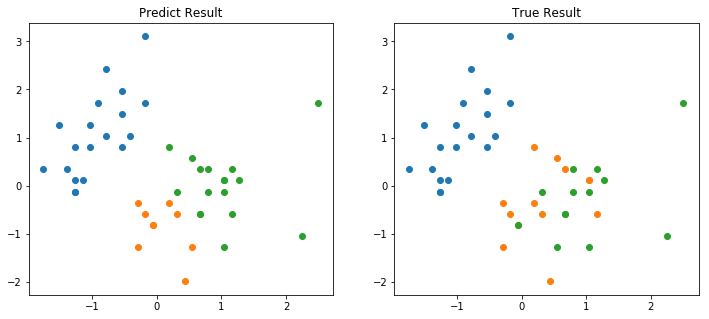

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_iris
from sklearn import svm

# Load Iris data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Standardize data
X = StandardScaler().fit_transform(X)

# Generate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create classifier and parameters
svmclf = svm.LinearSVC()
svmparams = {'C': [1, 5, 10, 20, 50, 75, 100]}

# Use GridSearchCV for optimizing
clf = GridSearchCV(svmclf, svmparams, cv = 10, verbose = 1)
clf.fit(X_train, y_train)

# Get the best estimator
BestClassifier = clf.best_estimator_
# Print the corresponding cross validated score
print ("The cross validated score for the best estimator is {}".format(clf.best_score_))
print ("The best params is set with {}".format(clf.best_params_))

# Print the details
print ("===============================")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std, params))
print ("===============================")

# Using testing data and the best estimator to predict the label
y_predict = BestClassifier.predict(X_test)
score = BestClassifier.score(X_test, y_test)
print ("The classification score is {}.".format(score))

# Reporting the detailed classification result
print ("===============================\nClassification report: \n", classification_report(y_test, y_predict))
print ("===============================\nConfusion matrix: \n", confusion_matrix(y_test, y_predict))

# Plotting the classification results
# Predicted results
Class_One = np.where(y_predict==0)
Class_Two = np.where(y_predict==1)
Class_Three = np.where(y_predict==2)

# Ground truth
P_One = np.where(y_test==0)
P_Two = np.where(y_test==1)
P_Three  = np.where(y_test==2)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax1.set_title("Predict Result")
ax1.scatter(X_test[Class_One,0], X_test[Class_One,1])
ax1.scatter(X_test[Class_Two,0], X_test[Class_Two,1])
ax1.scatter(X_test[Class_Three,0], X_test[Class_Three,1])

ax2 = fig.add_subplot(122)
ax2.set_title("True Result")
ax2.scatter(X_test[P_One,0], X_test[P_One,1])
ax2.scatter(X_test[P_Two,0], X_test[P_Two,1])
ax2.scatter(X_test[P_Three,0], X_test[P_Three,1])

plt.show()

## <!--例子二 数字图像分类--> Example 2. Digits number recognition

<!--下面我们用digits数据库来进行一个关于数字图像的分类任务。
关于digits数据库： 由1797张8x8的数字图像的像素组成的数据库。
首先，我们导入digits数据库：-->

In this example, we use the **digits** dataset.

This dataset contains 1797 samples, and each sample is a 8x8 figure.

Now we load the dataset:

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
labels = digits.target

print ("Data shape: {}".format(images.shape))

Data shape: (1797, 8, 8)


<!--这里面，images就是那1797个8x8的像素数据，labels就是那1797个数据对应的数据(0-9).
我们来看看这个数据集里面前6个数字是什么：-->

Let's see what the first 6 sample looks like,

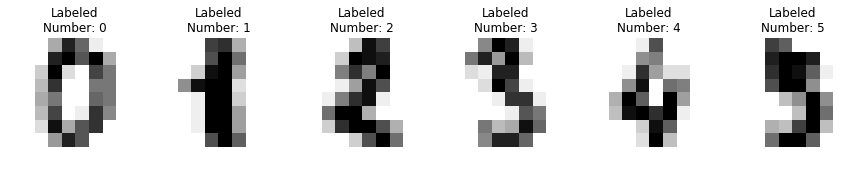

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 2))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(images[i, :, :], cmap=plt.cm.gray_r)
    plt.title('Labeled\nNumber: {}'.format(labels[i]))
    plt.axis('off')

<!--下面我们来训练分类器。 首先，我们得把8x8的数据拉平到1x64并且标准化数据：-->
For the classification approach, we need to flatten the data, e.g., change 8x8 to 1x64.

Then we need standardize the data:

In [21]:
data = images.reshape((len(labels), -1))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data = scaler.transform(data)

<!--然后我们需要分出来训练集和测试集：-->
After that, we can split the training set and testing set,

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = 442)
print ("Training Set Sample Number: {}".format(X_train.shape[0]))
print ("Testing Set Sample Number: {}".format(X_test.shape[0]))

Training Set Sample Number: 1257
Testing Set Sample Number: 540


<!--然后我们随机定义一组Random Forest参数，然后用GridSearchCV来找出来最好的分类器：-->
Then we set a set of parameters for Random Forest, and use GridSearchCV to find the best one,

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RF

rfparams = {'n_estimators': [10,20,50,100], 'max_depth': [3, 4, 5]}
rfclf = RF()

clf = GridSearchCV(rfclf, rfparams, cv = 5, verbose = 1)
clf.fit(X_train, y_train)

print ("The best estimator is trained by {}".format(clf.best_params_))
print ("The cross validated score is {}".format(clf.best_score_))

_b_rf = clf.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best estimator is trained by {'max_depth': 5, 'n_estimators': 100}
The cross validated score is 0.9268098647573588


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.2s finished


<!--然后我们用测试集来看看这个分类器的性能：-->
Let's see the performance of the classifier,

In [24]:
y_pred = _b_rf.predict(X_test)
print ("The Random Forest classification score on the testing set is {}%".format(round(_b_rf.score(X_test, y_test),4)*100))

The Random Forest classification score on the testing set is 95.56%


<!--下面我们来看看各个详细的分类报告：-->
Oh, this score is pretty high.
Let's see the classification report:

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print ("Classification report:")
print (classification_report(y_test, y_pred))
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.98      0.97      0.97        59
          1       0.94      0.98      0.96        46
          2       0.96      0.96      0.96        54
          3       0.93      0.93      0.93        55
          4       0.94      0.98      0.96        66
          5       0.96      0.96      0.96        49
          6       0.98      1.00      0.99        58
          7       0.97      0.98      0.97        57
          8       0.94      0.87      0.90        53
          9       0.95      0.91      0.93        43

avg / total       0.96      0.96      0.96       540

Confusion matrix:
[[57  0  0  0  2  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  2]
 [ 1  1  0 51  0  0  0  0  2  0]
 [ 0  0  0  0 65  0  0  1  0  0]
 [ 0  0  0  0  1 47  1  0  0  0]
 [ 0  0  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  1  0  0 56  0  0]
 [ 0  2  2  2  0  1  0  0 46  0]
 [ 0  0  0  1  0  1  0 

<!--这样，这个任务就完成啦！我们来看看测试集的前几个数字是什么：-->
Done! We can also see the first 6 prediction numbers:

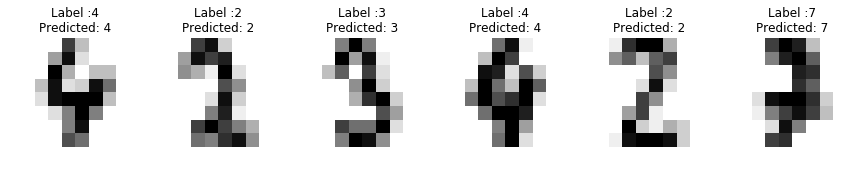

In [27]:
plt.figure(figsize=(15, 2))
for i in range(6):
    index = i
    plt.subplot(1, 6, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[index, :]).reshape((8,8)), cmap=plt.cm.gray_r)
    plt.title('Label :{}\nPredicted: {}'.format(y_test[index], y_pred[index]))
    plt.axis('off')

### <!--完整版：--> Release version

The first 6 digits in the training set:


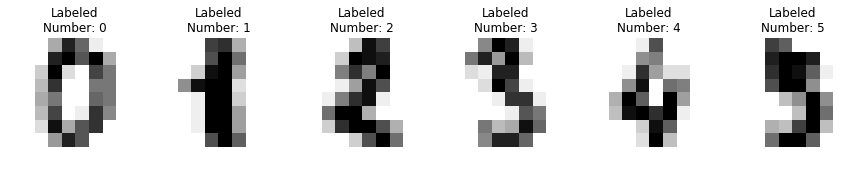

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.2s finished


The Random Forest classification score on the testing set is 94.63000000000001%
Classification report:
             precision    recall  f1-score   support

          0       0.98      0.97      0.97        59
          1       0.90      0.98      0.94        46
          2       0.96      0.96      0.96        54
          3       0.96      0.89      0.92        55
          4       0.94      0.98      0.96        66
          5       0.94      0.94      0.94        49
          6       0.98      0.98      0.98        58
          7       0.98      0.96      0.97        57
          8       0.89      0.89      0.89        53
          9       0.90      0.88      0.89        43

avg / total       0.95      0.95      0.95       540

Confusion matrix:
[[57  0  0  0  1  0  0  0  1  0]
 [ 0 45  0  0  0  0  0  0  0  1]
 [ 0  0 52  0  0  0  0  0  0  2]
 [ 1  1  0 49  0  1  0  0  3  0]
 [ 0  0  0  0 65  0  0  0  1  0]
 [ 0  0  0  0  1 46  1  0  1  0]
 [ 0  1  0  0  0  0 57  0  0  0]
 [ 0  0  

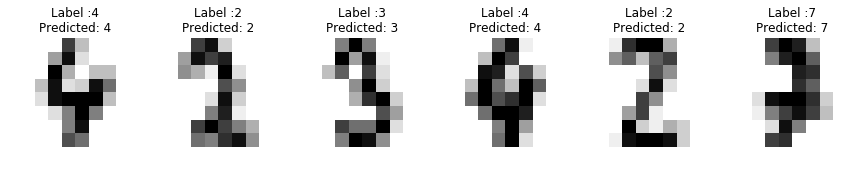

In [28]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib import pyplot as plt

# Load digits
digits = load_digits()
images = digits.images
labels = digits.target

# Standardize data
data = images.reshape((len(labels), -1))

scaler = StandardScaler().fit(data)
data = scaler.transform(data)

# Generate training set and testing set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = 442)

print ("The first 6 digits in the training set:")
plt.figure(figsize=(15, 2))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(images[i, :, :], cmap=plt.cm.gray_r)
    plt.title('Labeled\nNumber: {}'.format(labels[i]))
    plt.axis('off')
plt.show()

# Set params and classifier for GridSearchCV
rfparams = {'n_estimators': [10,20,50,100], 'max_depth': [3, 4, 5]}
rfclf = RF()

clf = GridSearchCV(rfclf, rfparams, cv = 5, verbose = 1)
clf.fit(X_train, y_train)

# Get the best classifier
_b_rf = clf.best_estimator_

y_pred = _b_rf.predict(X_test)
print ("The Random Forest classification score on the testing set is {}%".format(round(_b_rf.score(X_test, y_test),4)*100))

print ("Classification report:")
print (classification_report(y_test, y_pred))
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))

print ("\nThe first 6 digits in the testing set:")
plt.figure(figsize=(15, 2))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i, :]).reshape((8,8)), cmap=plt.cm.gray_r)
    plt.title('Label :{}\nPredicted: {}'.format(y_test[i], y_pred[i]))
    plt.axis('off')
    
plt.show()

## <!--例子三 人脸识别-->Example 3. Face recognition

<!--人脸识别是比较高级的分类任务。
由于人脸数据库有点大(200mb+),所以并没有直接包含在Scikit-Learn中，但是Scikit-Learn提供了获取一个人脸数据库的方法：**fetch_lfw_people**。
但是由于lfw_people是个挺大的数据库，包含13233个样本，每个样本的特征维度是5828，所以作为例子，我们只取部分来使用：-->
Face recognition is well required in our daily life.

Here we prepare a example for the face recognition. We use the **lfw_people** as our dataset.

First, we load the parts of the data (whole data is too large),

In [29]:
from sklearn.datasets import fetch_lfw_people
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

X = lfw_people.data
y = lfw_people.target
name = lfw_people.target_names
images = lfw_people.images
imgsize = images.shape[1:]

print ("Generated samples: {}".format(X.shape[0]))
print ("Features for each sample: {}".format(X.shape[1]))
print ("Image size for each sample: {}".format(imgsize))
print ("Total classes: {}".format(len(np.unique(y))))
print (name)

Generated samples: 1560
Features for each sample: 1850
Image size for each sample: (50, 37)
Total classes: 12
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


<!--这样我们就生成好了要使用的数据。我们来看看这个数据库前几张的图片是什么：-->
Let's see the peoples in our dataset.

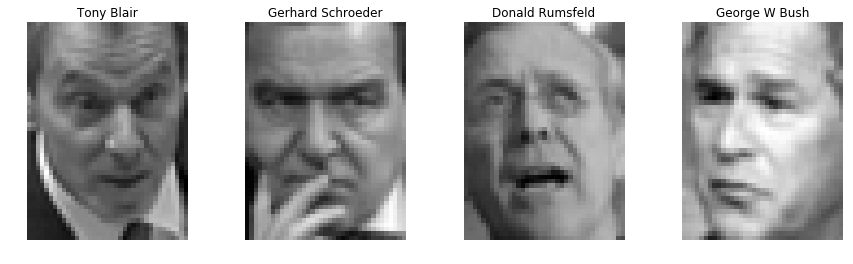

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i, :, :], cmap=plt.cm.gray)
    plt.title(name[y[i]])
    plt.axis('off')
plt.show()

<!--我们观察到数据集X本身就已经是 *样本数 x 特征数* 这样的格式，所以我们就可以直接标准化数据：-->
Since we have already got the data with shape *[n_sample * n_feature]*, we can just standardize the data,

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

<!--然后我们要把这个数据集X分成训练集和测试集：-->
And split the data,

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

<!--<font color=blue>但是这里**有个问题**，每个样本的特征数量是1850，为了节省时间，这里我们用主成分分析（**PCA**）来进行数据降维。</font>
维度50是个看上去不错的选择。-->

But there is a situation. The n_feature is 1850, which is large enough.

So here we use <font color=blue>**PCA**</font> to reduce the dimension,e.g., 50 seems good.

In [33]:
from sklearn.decomposition import PCA

n_compoents = 50
pca = PCA(n_compoents).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

<!--我们可以看看原始的数据经过降维以后是什么样子：-->
We can see the eigenface for the data,

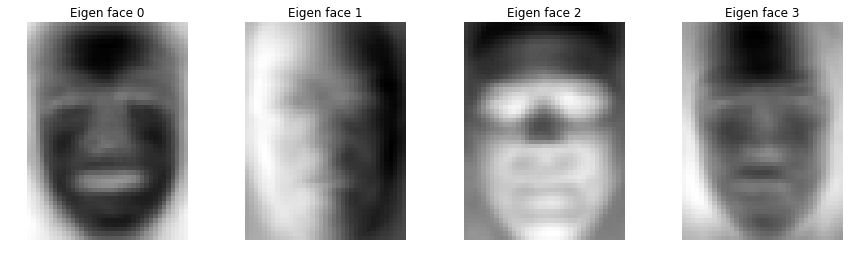

In [34]:
eigenfaces = pca.components_.reshape((n_compoents, imgsize[0], imgsize[1]))

plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
    plt.title("Eigen face {}".format(i))
    plt.axis('off')
plt.show()

<!--下面我们就可以用GridSearchCV来训练一个分类器了，比如LinearSVM。
然后我们找出其中最好的分类器并将其用在测试集上：-->
Now we can apply GridSearchCV for SVM to get the best estimator,

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svmparams = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma':[0.0001, 0.001, 0.01]}
svmclf = svm.SVC(kernel='rbf')


clf = GridSearchCV(svmclf, svmparams, cv = 5, verbose=1)
clf.fit(X_train_pca, y_train)

_b_clf = clf.best_estimator_
print ("The best params are {}".format(clf.best_params_))
print ("The corresponding cross validated score is {}".format(clf.best_score_))

y_pred = _b_clf.predict(X_test_pca)
print ("The SVM classification score for the testing set is {}".format(_b_clf.score(X_test_pca, y_test)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
The best params are {'C': 1000.0, 'gamma': 0.0001}
The corresponding cross validated score is 0.7452991452991453
The SVM classification score for the testing set is 0.7769230769230769


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.6s finished


<!--我们可以查看这个分类器的分类详情：-->
Let's see the classification report and confusion matrix,

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification report:")
print (classification_report(y_test, y_pred, target_names = name))
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))

Classification report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.81      0.67        16
     Colin Powell       0.86      0.89      0.87        66
  Donald Rumsfeld       0.60      0.67      0.63        27
    George W Bush       0.86      0.84      0.85       140
Gerhard Schroeder       0.58      0.58      0.58        24
      Hugo Chavez       0.80      0.71      0.75        17
   Jacques Chirac       0.50      0.40      0.44        10
    Jean Chretien       0.85      0.79      0.81        14
    John Ashcroft       0.82      0.88      0.85        16
Junichiro Koizumi       0.82      0.82      0.82        11
  Serena Williams       0.88      0.78      0.82         9
       Tony Blair       0.69      0.62      0.66        40

      avg / total       0.78      0.78      0.78       390

Confusion matrix:
[[ 13   1   1   0   0   0   0   0   0   0   0   1]
 [  3  59   0   3   0   0   1   0   0   0   0   0]
 [  2   0  18   3   0   0   

同样，我们也可以看看预测结果的前几个图像

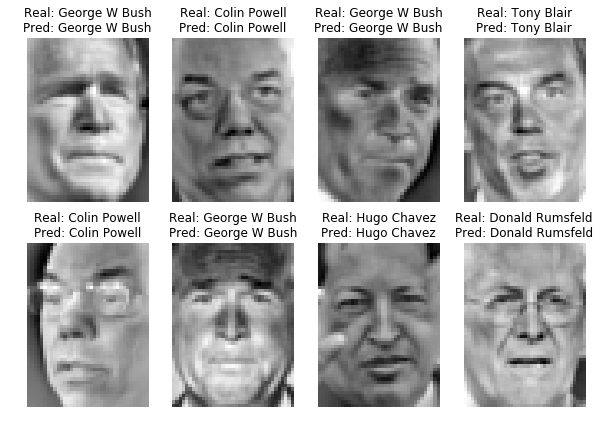

In [37]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom=0.01)
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i, :].reshape(imgsize), cmap=plt.cm.gray)
    plt.title("Real: {}\nPred: {}".format(name[y_test[i]], name[y_pred[i]]))
    plt.axis('off')
plt.show()

### Release Code for Face Recognition

Generated samples: 1560
Features for each sample: 1850
Image size for each sample: (50, 37)
Total classes: 12
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


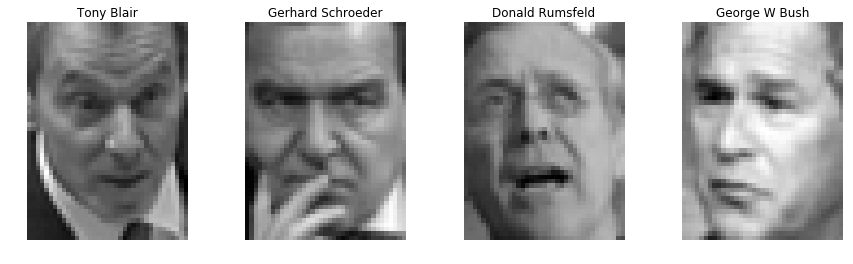

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.6s finished


The best params are {'C': 1000.0, 'gamma': 0.0001}
The corresponding cross validated score is 0.7521367521367521
The SVM classification score for the testing set is 0.7717948717948718
Classification report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.81      0.68        16
     Colin Powell       0.83      0.91      0.87        66
  Donald Rumsfeld       0.60      0.67      0.63        27
    George W Bush       0.85      0.83      0.84       140
Gerhard Schroeder       0.60      0.50      0.55        24
      Hugo Chavez       0.80      0.71      0.75        17
   Jacques Chirac       0.67      0.40      0.50        10
    Jean Chretien       0.85      0.79      0.81        14
    John Ashcroft       0.78      0.88      0.82        16
Junichiro Koizumi       0.82      0.82      0.82        11
  Serena Williams       0.88      0.78      0.82         9
       Tony Blair       0.64      0.62      0.63        40

      avg / total       

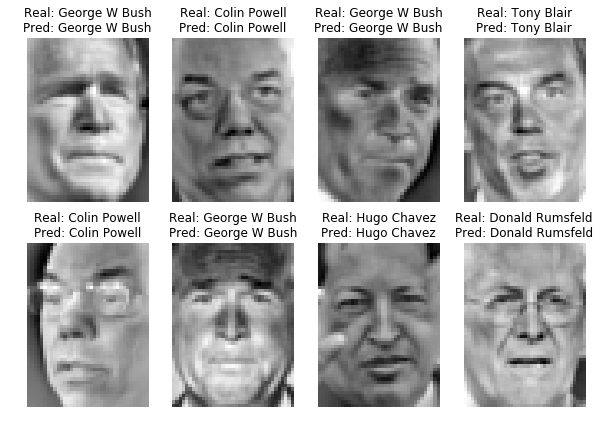

In [38]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Load Data
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

X = lfw_people.data
y = lfw_people.target
name = lfw_people.target_names
images = lfw_people.images
imgsize = images.shape[1:]

print ("Generated samples: {}".format(X.shape[0]))
print ("Features for each sample: {}".format(X.shape[1]))
print ("Image size for each sample: {}".format(imgsize))
print ("Total classes: {}".format(len(np.unique(y))))
print (name)


# Show the first 4 person in the data
plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i, :, :], cmap=plt.cm.gray)
    plt.title(name[y[i]])
    plt.axis('off')
plt.show()

# Standardize data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

# PCA
n_compoents = 50
pca = PCA(n_compoents).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# PCA Plot

# eigenfaces = pca.components_.reshape((n_compoents, imgsize[0], imgsize[1]))
# plt.figure(figsize=(15, 4))
# for i in range(4):
#     plt.subplot(1, 4, i + 1)
#     plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
#     plt.title("Eigen face {}".format(i))
#     plt.axis('off')
# plt.show()


# GridSeearchCV
svmparams = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma':[0.0001, 0.001, 0.01]}
svmclf = svm.SVC(kernel='rbf')


clf = GridSearchCV(svmclf, svmparams, cv = 5, verbose=1)
clf.fit(X_train_pca, y_train)

_b_clf = clf.best_estimator_
print ("The best params are {}".format(clf.best_params_))
print ("The corresponding cross validated score is {}".format(clf.best_score_))

y_pred = _b_clf.predict(X_test_pca)
print ("The SVM classification score for the testing set is {}".format(_b_clf.score(X_test_pca, y_test)))

print ("Classification report:")
print (classification_report(y_test, y_pred, target_names = name))
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom=0.01)
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i, :].reshape(imgsize), cmap=plt.cm.gray)
    plt.title("Real: {}\nPred: {}".format(name[y_test[i]], name[y_pred[i]]))
    plt.axis('off')
plt.show()

***

## <!--使用总结-->Summary

<!--机器学习方法的基本使用流程分为3块-->
There are mainly three components in Scikit-Learn machine learning:
    
<!--+ 数据预处理
    + 加载数据
        + <font color=#0099ff>load_data()</font>
    + 数据变形(如适用)：把数据处理成适合分类器的形状，比如，一个样本的特征用一个向量表示。
        + <font color=#0099ff>reshape()</font>
    + 数据标准化：标准化数据可以使数据的分布均值为0，方差为1 （高斯分布）
        + <font color=#0099ff>StandardScaler()</font>
    + 生成训练集与测试集
        + <font color=#0099ff>train_test_split()</font>
+ 训练分类器
    + <font color=#0099ff>GridSearchCV(Classifier, params)</font>
+ 输出结果
    + <font color=#0099ff>classification_report()</font>
    + <font color=#0099ff>confusion_matrix()</font>
    + <font color=red>(Opt)</font> <font color=#0099ff>imshow()</font>-->
    
    
+ **Data Processing**
    + Load data
        + <font color=#0099ff>load_data()</font>
    + <font color=red>(Opt)</font> Switch data shape
        + <font color=#0099ff>reshape()</font>
    + Standardization
        + <font color=#0099ff>StandardScaler()</font>
    + Training and testing data
        + <font color=#0099ff>train_test_split()</font>
+ **Classifier Training**
    + <font color=#0099ff>GridSearchCV(Classifier, params)</font>
+ **Output showing**
    + <font color=#0099ff>classification_report()</font>
    + <font color=#0099ff>confusion_matrix()</font>
    + <font color=red>(Opt)</font> <font color=#0099ff>imshow()</font>
 ***

***

## Other Scikit-Learn Provided Data

### Wine
+ Classes: 3
+ Samples per class: 59, 71, 48
+ Samples total: 178
+ Dimensionality: 13

In [ ]:
from sklearn.datasets import load_wine
Wine = load_wine()
X = Wine.data
y = Wine.target

### Breast Cancer
+ Classes: 2
+ Samples per class: 212(M), 357(B)
+ Samples total: 569
+ Dimensionality: 30

In [ ]:
from sklearn.datasets import load_breast_cancer
Data = load_breast_cancer()
X = Data.data
y = Data.target